# Graphs for Rapport

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import holidays


In [12]:
def add_features(df):
  ####################### TIMED BASED FEATURES  #######################
  df['Day_of_Week'] = df.index.dayofweek
  df['Hour_of_Day'] = df.index.hour
  df['Month_of_Year'] = df.index.month
  df['Year'] = df.index.year
  df['Day/Night'] = (df['Hour_of_Day'] >= 6) & (df['Hour_of_Day'] <= 18)

  # Add holiday
  us_holidays = holidays.US(years=range(2018, 2023 + 1))
  df['IsHoliday'] = df.index.map(lambda x: 1 if x.date() in us_holidays else 0)

  # Add weekend
  df['Weekend'] = (df['Day_of_Week'] >= 5).astype(int)

  ####################### CYCLIC FEATURES  #######################

  df['HourSin'] = np.sin(2 * np.pi * df['Hour_of_Day'] / 24)
  df['HourCos'] = np.cos(2 * np.pi * df['Hour_of_Day'] / 24)
  df['DayOfWeekSin'] = np.sin(2 * np.pi * df['Day_of_Week'] / 7)
  df['DayOfWeekCos'] = np.cos(2 * np.pi * df['Day_of_Week'] / 7)
  df['MonthOfYearSin'] = np.sin(2 * np.pi * df['Month_of_Year'] / 12)
  df['MonthOfYearCos'] = np.cos(2 * np.pi * df['Month_of_Year'] / 12)

  ####################### SEASONAL FEATURES  #######################
  month_to_season = {1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2,
                     7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 0}
  df['Season'] = df['Month_of_Year'].map(month_to_season)

  ####################### HISTORICAL CONSUMPTION FEATURES  #######################
  df['Aggregated_charging_load_1h'] = df['Aggregated charging load'].shift(1)
  df['Aggregated_charging_load_6h'] = df['Aggregated charging load'].shift(6)
  df['Aggregated_charging_load_12h'] = df['Aggregated charging load'].shift(12)
  df['Aggregated_charging_load_24h'] = df['Aggregated charging load'].shift(24)
  df['Aggregated_charging_load_1w'] = df['Aggregated charging load'].shift(24*7)
  df['Aggregated_charging_rolling'] = df['Aggregated charging load'].rolling(window=24).mean()

  return df


def parse_date(date):
    return pd.to_datetime(date, format='%b %d, %Y, %I:%M:%S %p')


def filter_data(start_date, end_date, data):
    return data[(data.index >= start_date) & (data.index <= end_date)].copy()


# Define the start and end dates
start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2032-01-01')

# Load the data
df = pd.read_csv('./DumbCharging_2020_to_2032/Measurements.csv')

df['Timestamp'] = df['Timestamp'].apply(parse_date)
df = df.set_index('Timestamp')

# Add features
feature_df = add_features(df)

# Filter the data
final_df = filter_data(start_date, end_date, feature_df)

print(final_df.head(24))

                     Passed hours  Year  Month  Day  Hour  Minute  \
Timestamp                                                           
2024-01-01 00:00:07       35064.0  2024    0.0  1.0   0.0     0.0   
2024-01-01 01:00:07       35065.0  2024    0.0  1.0   1.0     0.0   
2024-01-01 02:00:07       35066.0  2024    0.0  1.0   2.0     0.0   
2024-01-01 03:00:07       35067.0  2024    0.0  1.0   3.0     0.0   
2024-01-01 04:00:07       35068.0  2024    0.0  1.0   4.0     0.0   
2024-01-01 05:00:07       35069.0  2024    0.0  1.0   5.0     0.0   
2024-01-01 06:00:07       35070.0  2024    0.0  1.0   6.0     0.0   
2024-01-01 07:00:07       35071.0  2024    0.0  1.0   7.0     0.0   
2024-01-01 08:00:07       35072.0  2024    0.0  1.0   8.0     0.0   
2024-01-01 09:00:07       35073.0  2024    0.0  1.0   9.0     0.0   
2024-01-01 10:00:07       35074.0  2024    0.0  1.0  10.0     0.0   
2024-01-01 11:00:07       35075.0  2024    0.0  1.0  11.0     0.0   
2024-01-01 12:00:07       35076.0 

# Plots 

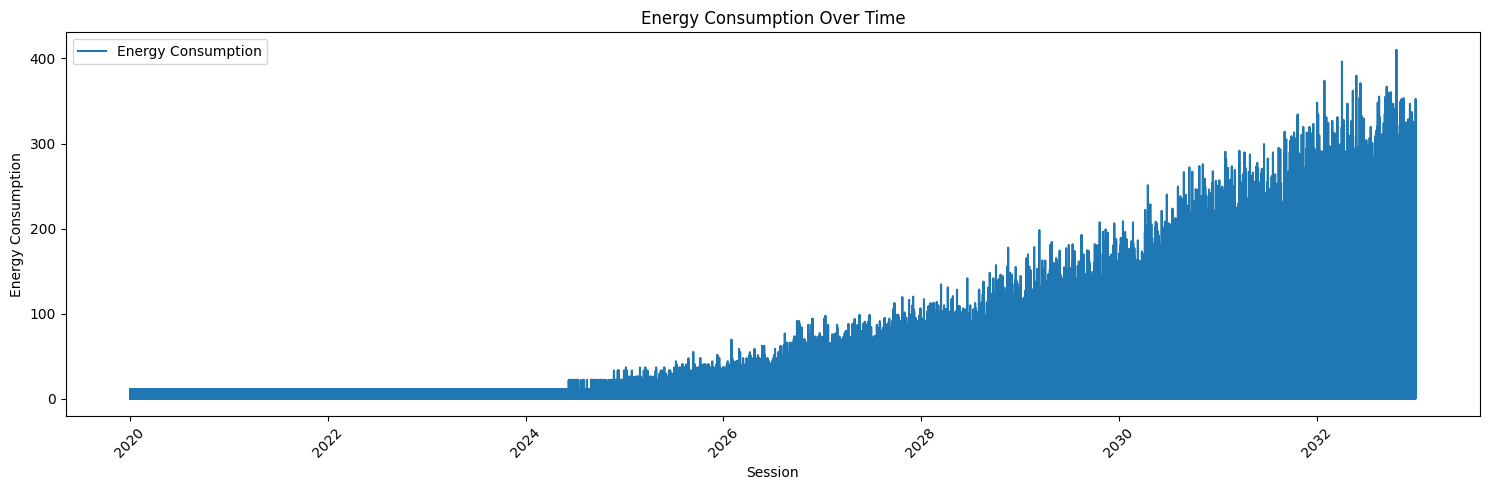

<Figure size 640x480 with 0 Axes>

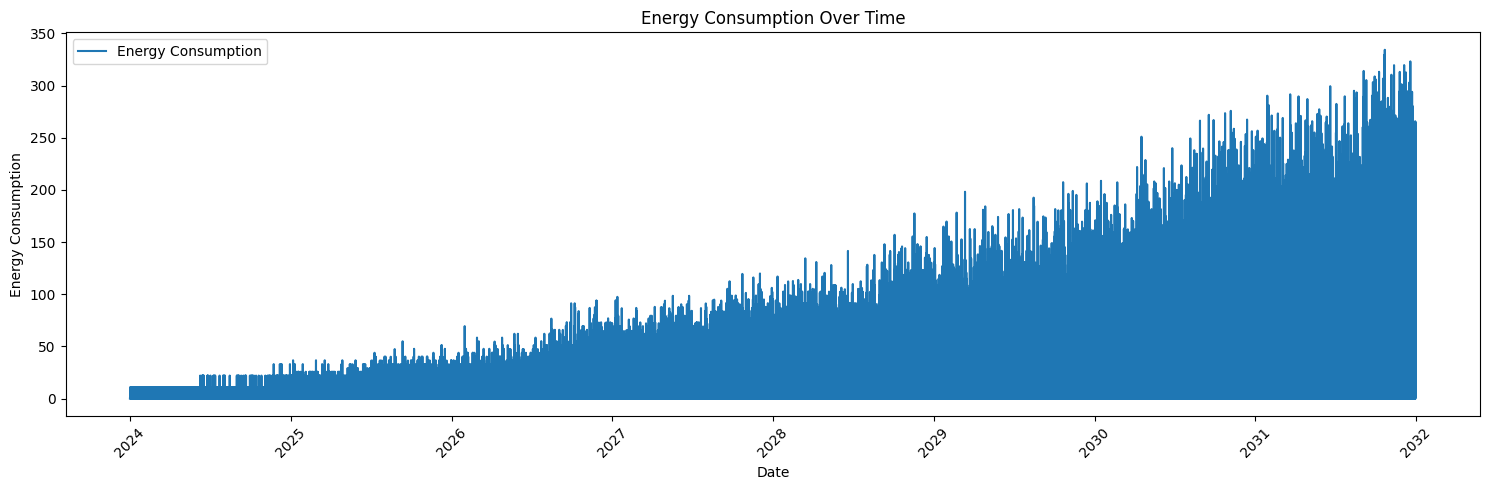

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plot the data
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Aggregated charging load'], label='Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.xlabel('Session')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('Aggregated Charging Load_Sessions.png', dpi=1200, bbox_inches='tight')

# Plot the entire dataset
plt.figure(figsize=(15, 5))
plt.plot(final_df.index, final_df['Aggregated charging load'], label='Energy Consumption')
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('Energy_Consumption_Hourly.png', dpi=1200, bbox_inches='tight')